In [3]:
#!/usr/bin/env python
%matplotlib inline  

#ipython magic to make ampmodule autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd
from scipy.stats import pearsonr,spearmanr

#pull in the classes to do the sims!
import AMPmodule

import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots

rez=600


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#first, control trial

N=1000 #number of participants in each trial

#    def __init__(self, name, nps, tF, dose, clade, rfrac, A0, iv_phi, maxIC50, v_flg, keep_flg):

%time tr_ctl=AMPmodule.trial(name='ctl', nps=N, tF=560, dose=0, clade='all', rfrac=0.1, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=2)


CPU times: user 8min 2s, sys: 315 ms, total: 8min 3s
Wall time: 8min 3s


In [5]:
#now do sensitivity analyses for maxIC50
mx=np.logspace(2,5,10)
sens=[]

counter=0
for ii in range(len(iv)):
    tr=AMPmodule.trial(name='ppt'+str(counter), nps=N, tF=560, 
                       dose=10, clade='all', rfrac=0,
                         A0=1, iv_phi=1, maxIC50=mx[ii], 
                           v_flg=False, keep_flg=0)
    sens.append(tr)
    counter+=1
    print(counter)



1
2
3
4
5
6
7
8
9
10


In [9]:
#few extra variables
nts=len(sens)
trials=range(nts)
alz=0.3
dotcolz='lightsteelblue'

def gather_output(tr):
    #detection times and intervals
    fpts=tr.fp_ts[tr.fp_vs>0]
    fpis=1+np.floor(tr.fp_ts[tr.fp_ts>0]/7/4)%2

    #first positive viral loads of breakthru infections
    fpvls=tr.fp_vs[tr.fp_vs>0] 
    fpvls1=fpvls[fpis==1]
    fpvls2=fpvls[fpis==2]

    IC50s=tr.bt_ic50s[tr.fp_vs>0]
    IC50s1=IC50s[fpis==1]
    IC50s2=IC50s[fpis==2]
    
    return fpts,fpis,fpvls,fpvls1,fpvls2,IC50s,IC50s1,IC50s2


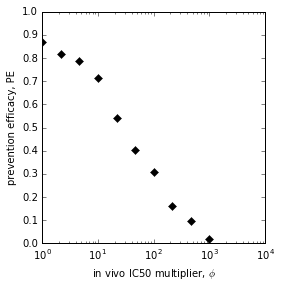

In [8]:
#prevention efficacy plots
plt.figure(figsize=(4,4),dpi=rez)
brks=np.zeros([nts])
for it in trials:    
    tr=sens[it]
    brks[it]=sum(tr.brks>0)

plt.semilogx(iv,1-brks/sum(tr_ctl.brks>0),color='k',marker='D',ls='')
plt.xlim([1,1e4])
plt.ylim([0,1])
plt.yticks(np.linspace(0,1,11))
plt.ylabel('prevention efficacy, PE')
plt.xlabel('in vivo IC50 multiplier, $\phi$')
plt.tight_layout()
plt.savefig('figures/PE_phi.pdf')


In [42]:
#few extra variables
nts=len(sens)
trials=range(nts)
alz=0.3
dotcolz='khaki'

fpts=[]; fpis=[]
fpvls=[]; fpvls1=[]; fpvls2=[];
IC50s=[]; IC50s1=[]; IC50s2=[];
for it in trials:    
    tr=sens[it]

    #first positive times and intervals
    fpts.append(tr.fp_ts[tr.fp_vs>0])
    fpis.append(1+np.floor(tr.fp_ts[tr.fp_ts>0]/7/4)%2)

    #first positive viral loads of breakthru infections
    fpvls.append(tr.fp_vs[tr.fp_vs>0])
    fpvls1.append(fpvls[it][fpis[it]==1])
    fpvls2.append(fpvls[it][fpis[it]==2])

    IC50s.append(tr.bt_ic50s[tr.fp_vs>0])
    IC50s1.append(IC50s[it][fpis[it]==1])
    IC50s2.append(IC50s[it][fpis[it]==2])
    
    

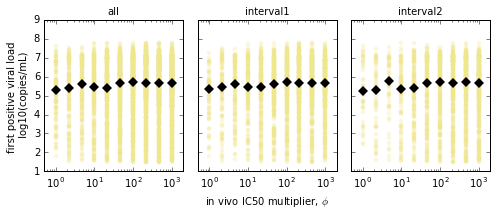

In [51]:
#first positive viral loads
fig,ax=plt.subplots(1,3,figsize=(7,3),dpi=rez,sharey=True,sharex=True)
for it in trials:    
    ax[0].scatter(np.ones(len(fpvls[it]))*iv[it],np.log10(fpvls[it]),color=dotcolz,lw=0,alpha=alz)
    ax[0].scatter(iv[it],np.median(np.log10(fpvls[it])),color='k',lw=0,marker='D',s=50)
    ax[1].scatter(np.ones(len(fpvls1[it]))*iv[it],np.log10(fpvls1[it]),color=dotcolz,lw=0,alpha=alz)
    ax[1].scatter(iv[it],np.median(np.log10(fpvls1[it])),color='k',lw=0,marker='D',s=50)
    ax[2].scatter(np.ones(len(fpvls2[it]))*iv[it],np.log10(fpvls2[it]),color=dotcolz,lw=0,alpha=alz)
    ax[2].scatter(iv[it],np.median(np.log10(fpvls2[it])),color='k',lw=0,marker='D',s=50)

ax[0].set_ylabel('first positive viral load \n log10(copies/mL)')
ax[1].set_xlabel('in vivo IC50 multiplier, $\phi$')

ax[0].set_title('all',fontsize=10)
ax[1].set_title('interval1',fontsize=10)
ax[2].set_title('interval2',fontsize=10)

plt.semilogx()
plt.xlim([0.5,2e3])
plt.tight_layout()

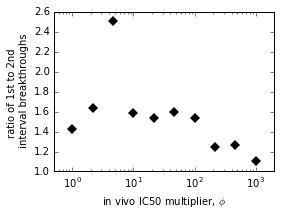

In [61]:
plt.figure(figsize=(4,3),dpi=rez)
#detection interval ratio

for it in trials:    
    plt.scatter(iv[it],np.sum(fpis[it]==1)/np.sum(fpis[it]==2),color='k',lw=0,marker='D',s=50)
plt.semilogx()
plt.xlim([0.5,2e3])
plt.ylabel('ratio of 1st to 2nd \n interval breakthroughs')
plt.xlabel('in vivo IC50 multiplier, $\phi$')

plt.tight_layout()

In [ ]:
#breakthrough IC50s positive viral loads
fig,ax=plt.subplots(1,3,figsize=(7,3),dpi=rez,sharey=True,sharex=True)
for it in trials:    
    ax[0].scatter(np.ones(len(IC50s[it]))*iv[it],np.log10(IC50s[it]),color=dotcolz,lw=0,alpha=alz)
    ax[0].scatter(iv[it],np.median(np.log10(IC50s[it])),color='k',lw=0,marker='D',s=50)
    ax[1].scatter(np.ones(len(IC50s1[it]))*iv[it],np.log10(IC50s1[it]),color=dotcolz,lw=0,alpha=alz)
    ax[1].scatter(iv[it],np.median(np.log10(IC50s1[it])),color='k',lw=0,marker='D',s=50)
    ax[2].scatter(np.ones(len(IC50s2[it]))*iv[it],np.log10(IC50s2[it]),color=dotcolz,lw=0,alpha=alz)
    ax[2].scatter(iv[it],np.median(np.log10(IC50s2[it])),color='k',lw=0,marker='D',s=50)

ax[0].set_ylabel('breakthrough IC50 \n log10(copies/mL)')
ax[1].set_xlabel('in vivo IC50 multiplier, $\phi$')

ax[0].set_title('all',fontsize=10)
ax[1].set_title('interval1',fontsize=10)
ax[2].set_title('interval2',fontsize=10)

plt.semilogx()
plt.xlim([0.5,2e3])
plt.tight_layout()